In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os



# Load Data
df = pd.read_csv('../data/processed_data.csv')

# Define Target and Features
target = 'Health_Risk_Score'
X = df.drop(columns=[target, 'health_risk_level_encoded', 'health_risk_level'], errors='ignore')
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (171, 55), Test Shape: (43, 55)


In [4]:
results_list = []

def evaluate_model(name, model):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    elapsed = time.time() - start_time
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    plt.title(f'{name}\nActual vs Predicted')
    plt.legend()
    plt.grid(True, alpha=0.3)
    safe_name = name.replace(" ", "_").replace("(", "").replace(")", "").replace("=", "_")
    plt.savefig(f'../visuals/plot_{safe_name}.png')
    plt.show()
    
    return {
        'Algorithm': name,
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'R2': round(r2, 4),
        'Runtime': round(elapsed, 4)
    }

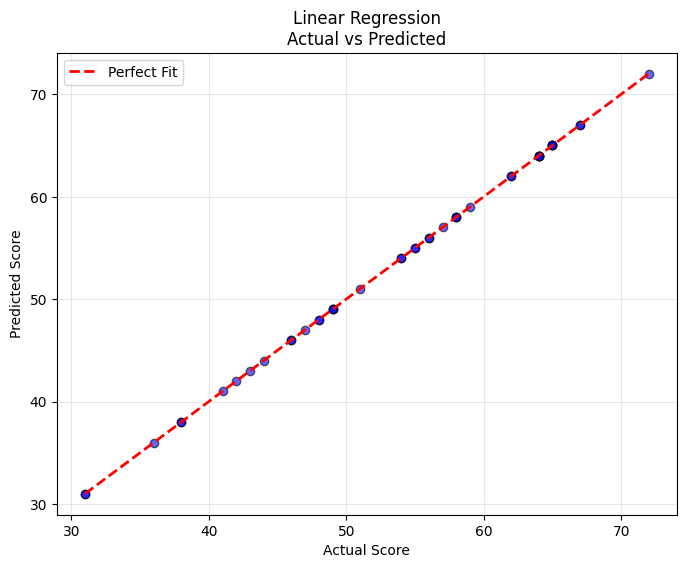

,Algorithm,MAE,RMSE,R2,Runtime
0,Linear Regression,0.0,0.0,1.0,0.0127


In [6]:
# Linear Regression
results = []
model = LinearRegression()

metrics = evaluate_model('Linear Regression', model)
results.append(metrics)

df_linear = pd.DataFrame(results)
display(df_linear)
df_linear.to_csv('../visuals/table_linear_regression.csv', index=False)
results_list.extend(results)

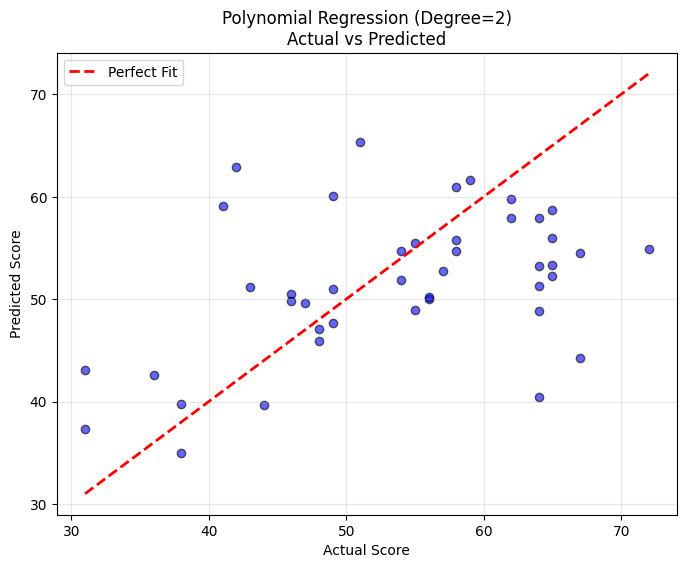

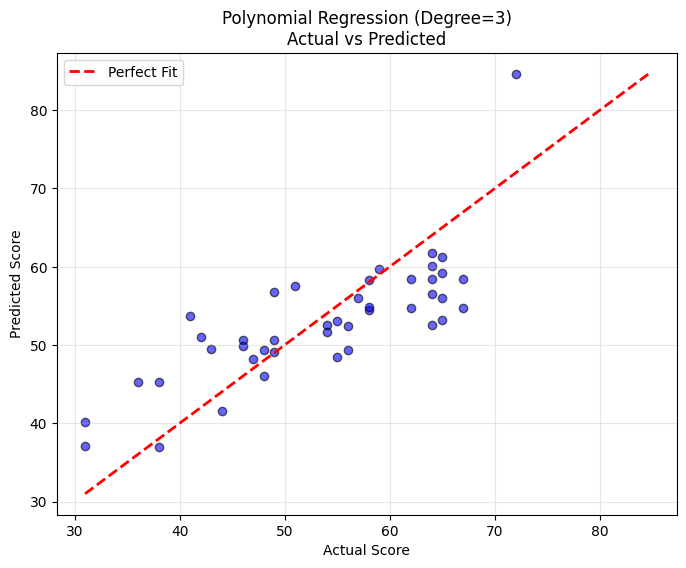

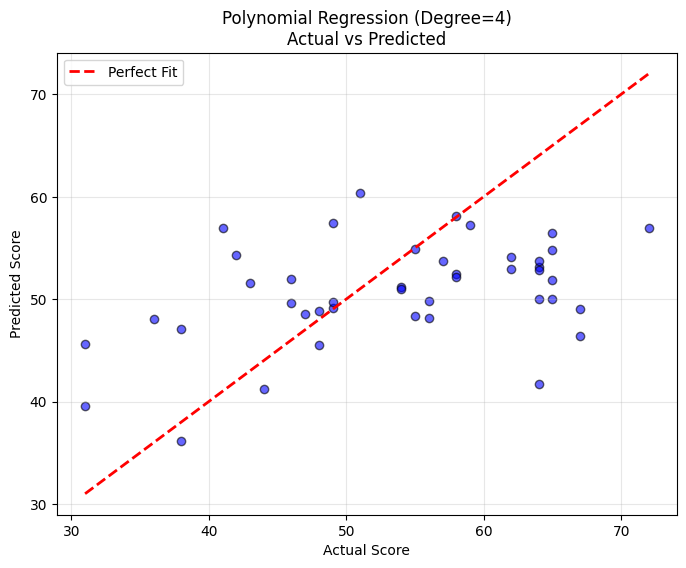

,Algorithm,MAE,RMSE,R2,Runtime
0,Polynomial Regression (Degree=2),7.6125,9.8141,0.1039,0.0658
1,Polynomial Regression (Degree=3),5.3291,6.4609,0.6116,0.8479
2,Polynomial Regression (Degree=4),8.0971,9.8813,0.0916,22.6658


In [7]:
# Polynomial Regression
poly_results = []
degrees = [2, 3, 4]

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    metrics = evaluate_model(f'Polynomial Regression (Degree={d})', model)
    poly_results.append(metrics)
    
df_poly = pd.DataFrame(poly_results)
display(df_poly)
df_poly.to_csv('../visuals/table_polynomial_regression.csv', index=False)
results_list.extend(poly_results)

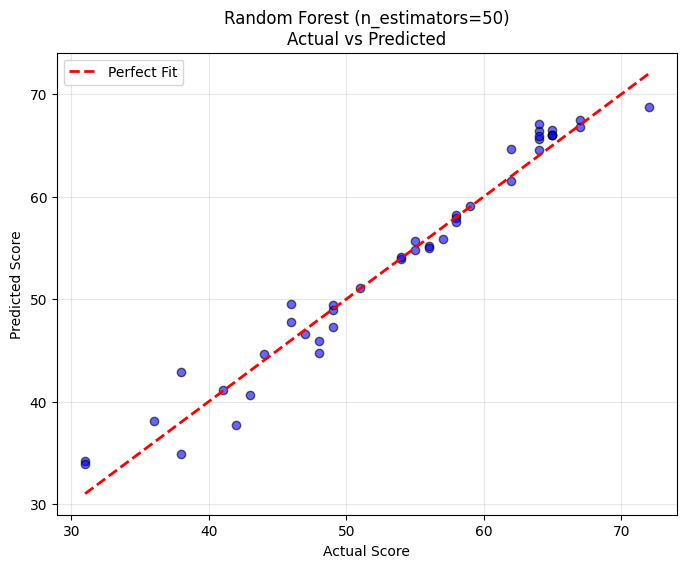

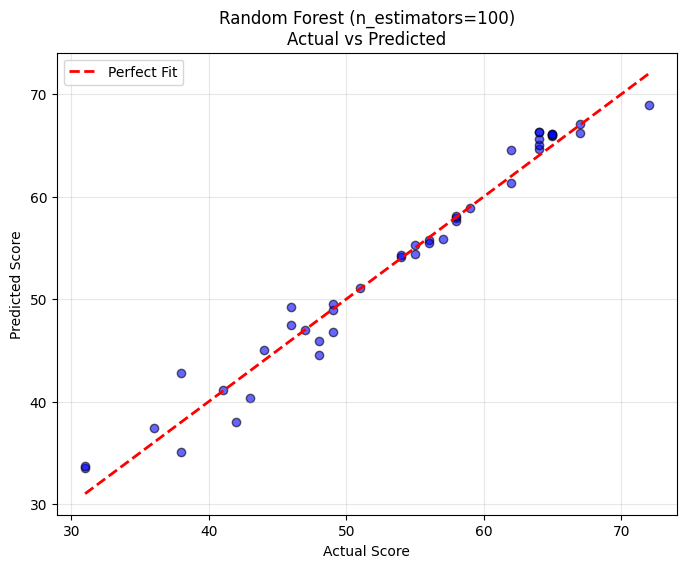

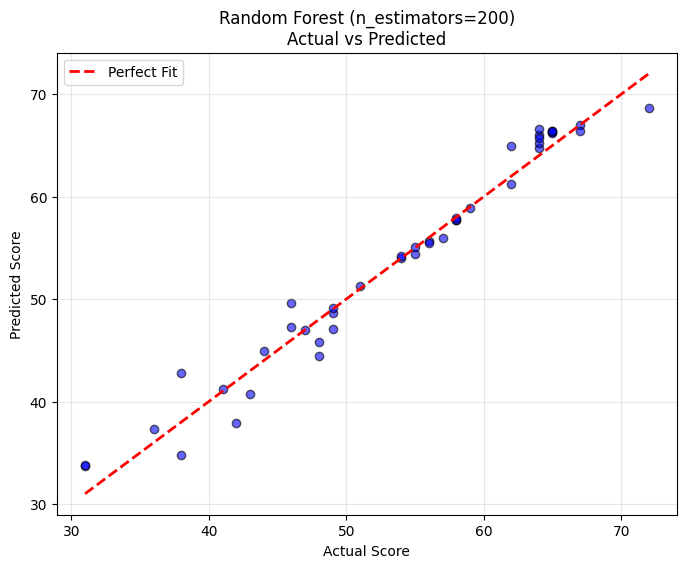

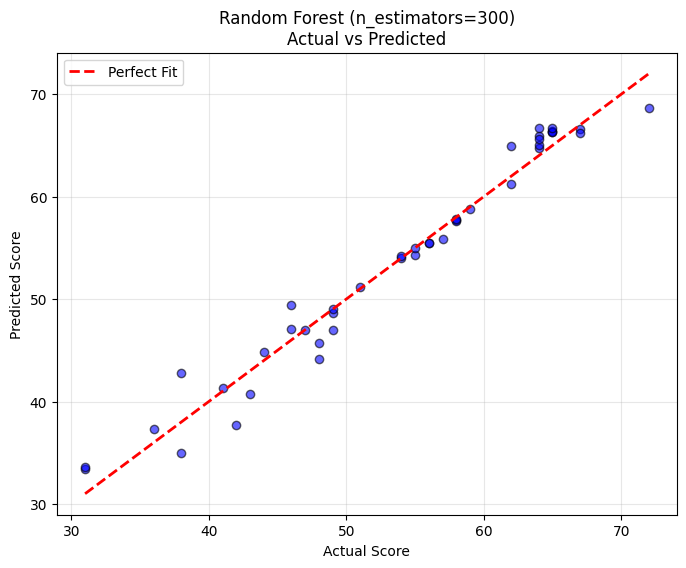

,Algorithm,MAE,RMSE,R2,Runtime
0,Random Forest (n_estimators=50),1.4651,1.9571,0.9644,0.1725
1,Random Forest (n_estimators=100),1.3547,1.8246,0.9690,0.1399
2,Random Forest (n_estimators=200),1.4136,1.8991,0.9664,0.2524
3,Random Forest (n_estimators=300),1.4298,1.9059,0.9662,0.4880


In [ ]:
# Random forest regressor
rf_results = []
estimators = [50, 100, 200, 300]

for n in estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    metrics = evaluate_model(f'Random Forest (n_estimators={n})', model)
    rf_results.append(metrics)

df_rf = pd.DataFrame(rf_results)
display(df_rf)
df_rf.to_csv('../visuals/table_random_forest_regression.csv', index=False)
results_list.extend(rf_results)

In [10]:
# Overall Comparison
# Consolidate all results for final comparison
final_df = pd.DataFrame(results_list)
final_df = final_df.sort_values(by='MAE', ascending=True)

display(final_df)
final_df.to_csv('../visuals/regression_comparison.csv', index=False)

best_row = final_df.iloc[0]
print(f"\nBest Model: {best_row['Algorithm']} (MAE: {best_row['MAE']})")

,Algorithm,MAE,RMSE,R2,Runtime
0,Linear Regression,0.0000,0.0000,1.0000,0.0127
5,Random Forest (n_estimators=100),1.3547,1.8246,0.9690,0.1399
6,Random Forest (n_estimators=200),1.4136,1.8991,0.9664,0.2524
7,Random Forest (n_estimators=300),1.4298,1.9059,0.9662,0.4880
4,Random Forest (n_estimators=50),1.4651,1.9571,0.9644,0.1725
2,Polynomial Regression (Degree=3),5.3291,6.4609,0.6116,0.8479
1,Polynomial Regression (Degree=2),7.6125,9.8141,0.1039,0.0658
3,Polynomial Regression (Degree=4),8.0971,9.8813,0.0916,22.6658



Best Model: Linear Regression (MAE: 0.0)
